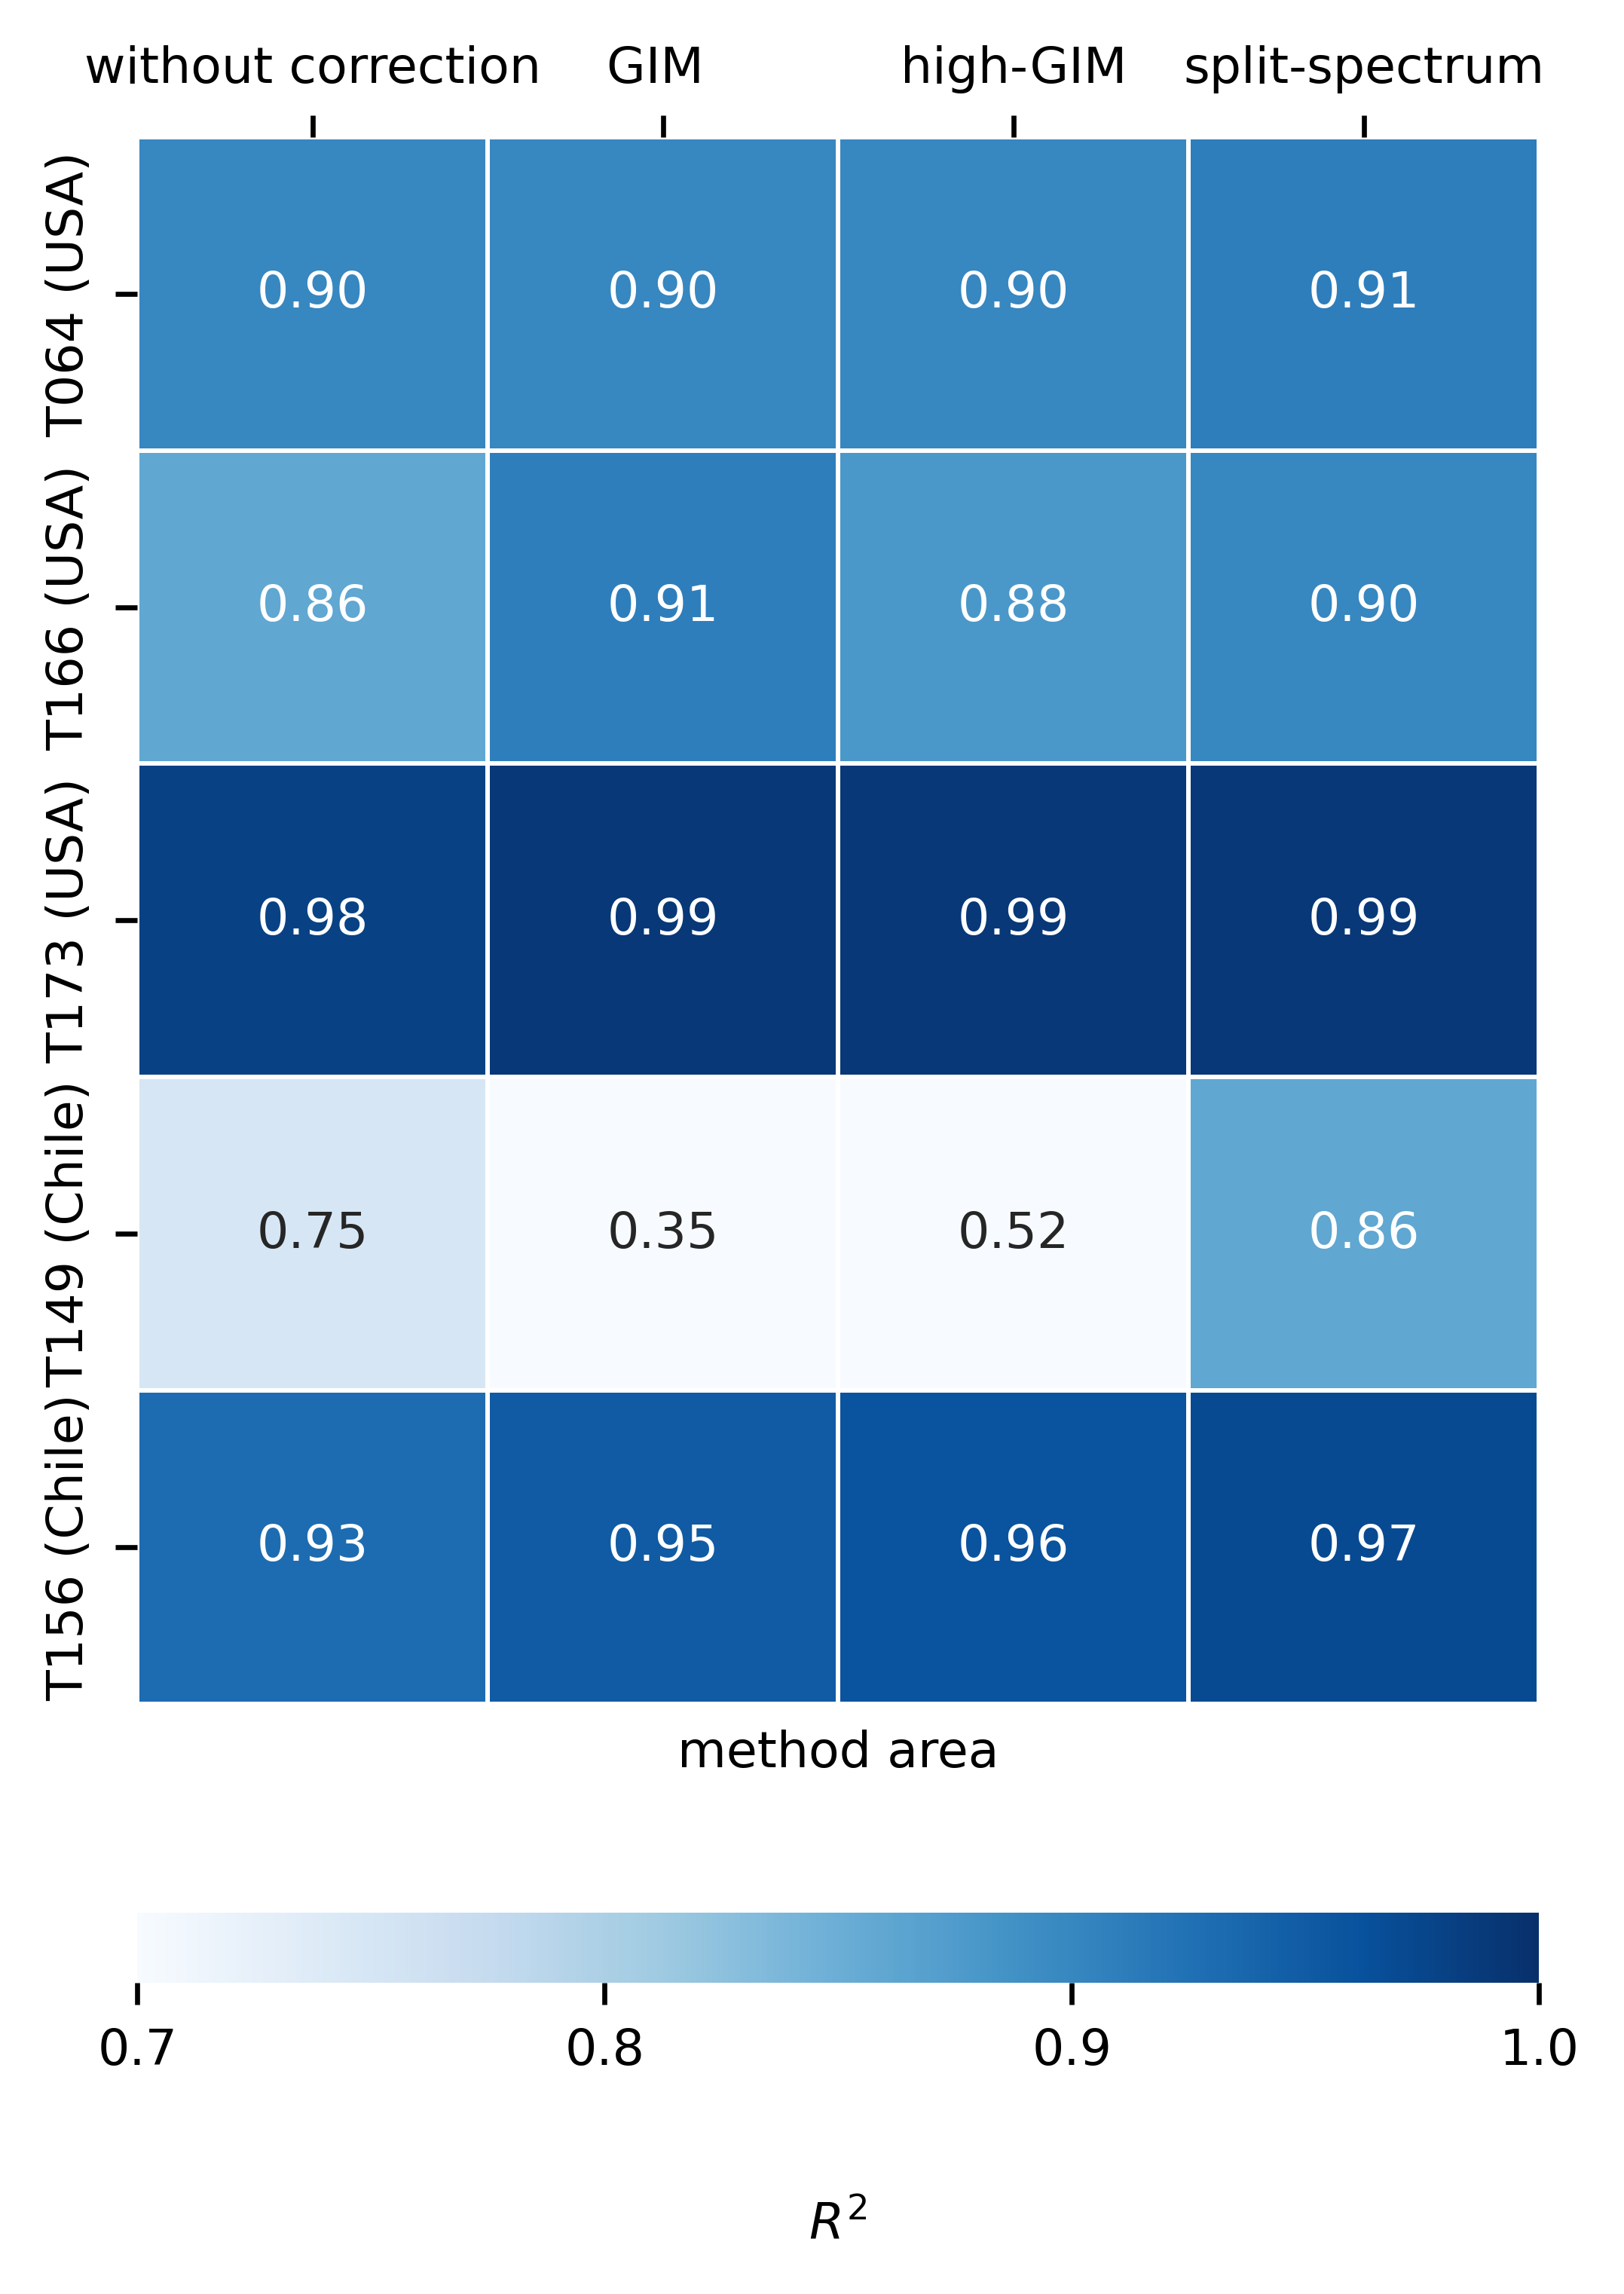

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置全局字体大小
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.titlesize'] = 8

# 创建数据
data = {
    'method area': ['without correction', 'GIM ','high-GIM', 'split-spectrum'],
    'T064 (USA)': [0.90, 0.90, 0.90, 0.91],
    'T166 (USA)': [0.86, 0.91, 0.88, 0.90],
    'T173 (USA)': [0.98, 0.99, 0.99, 0.99],
    'T149 (Chile)': [0.75, 0.35, 0.52, 0.86],
    'T156 (Chile)': [0.93, 0.95, 0.96, 0.97]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 转置DataFrame，以便每个地区成为一行
df = df.set_index('method area')

# 创建热图
plt.figure(dpi=600, figsize=(4, 6))

heatmap = sns.heatmap(df.T, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, 
                      vmin=0.7, vmax=1.0, cbar_kws={'ticks': [0.7, 0.8, 0.9, 1.0], 
                                'orientation': 'horizontal', 
                                'pad': 0.1})

# 设置color bar 标签
cbar = heatmap.collections[0].colorbar
cbar.set_label(r'$R^2$',  labelpad=20)

# 调整坐标轴标签位置
plt.gca().xaxis.set_ticks_position('top')  # 将x轴标签放在上方
plt.savefig('pic/R2.png', bbox_inches='tight', transparent=True, dpi=600)

plt.show()

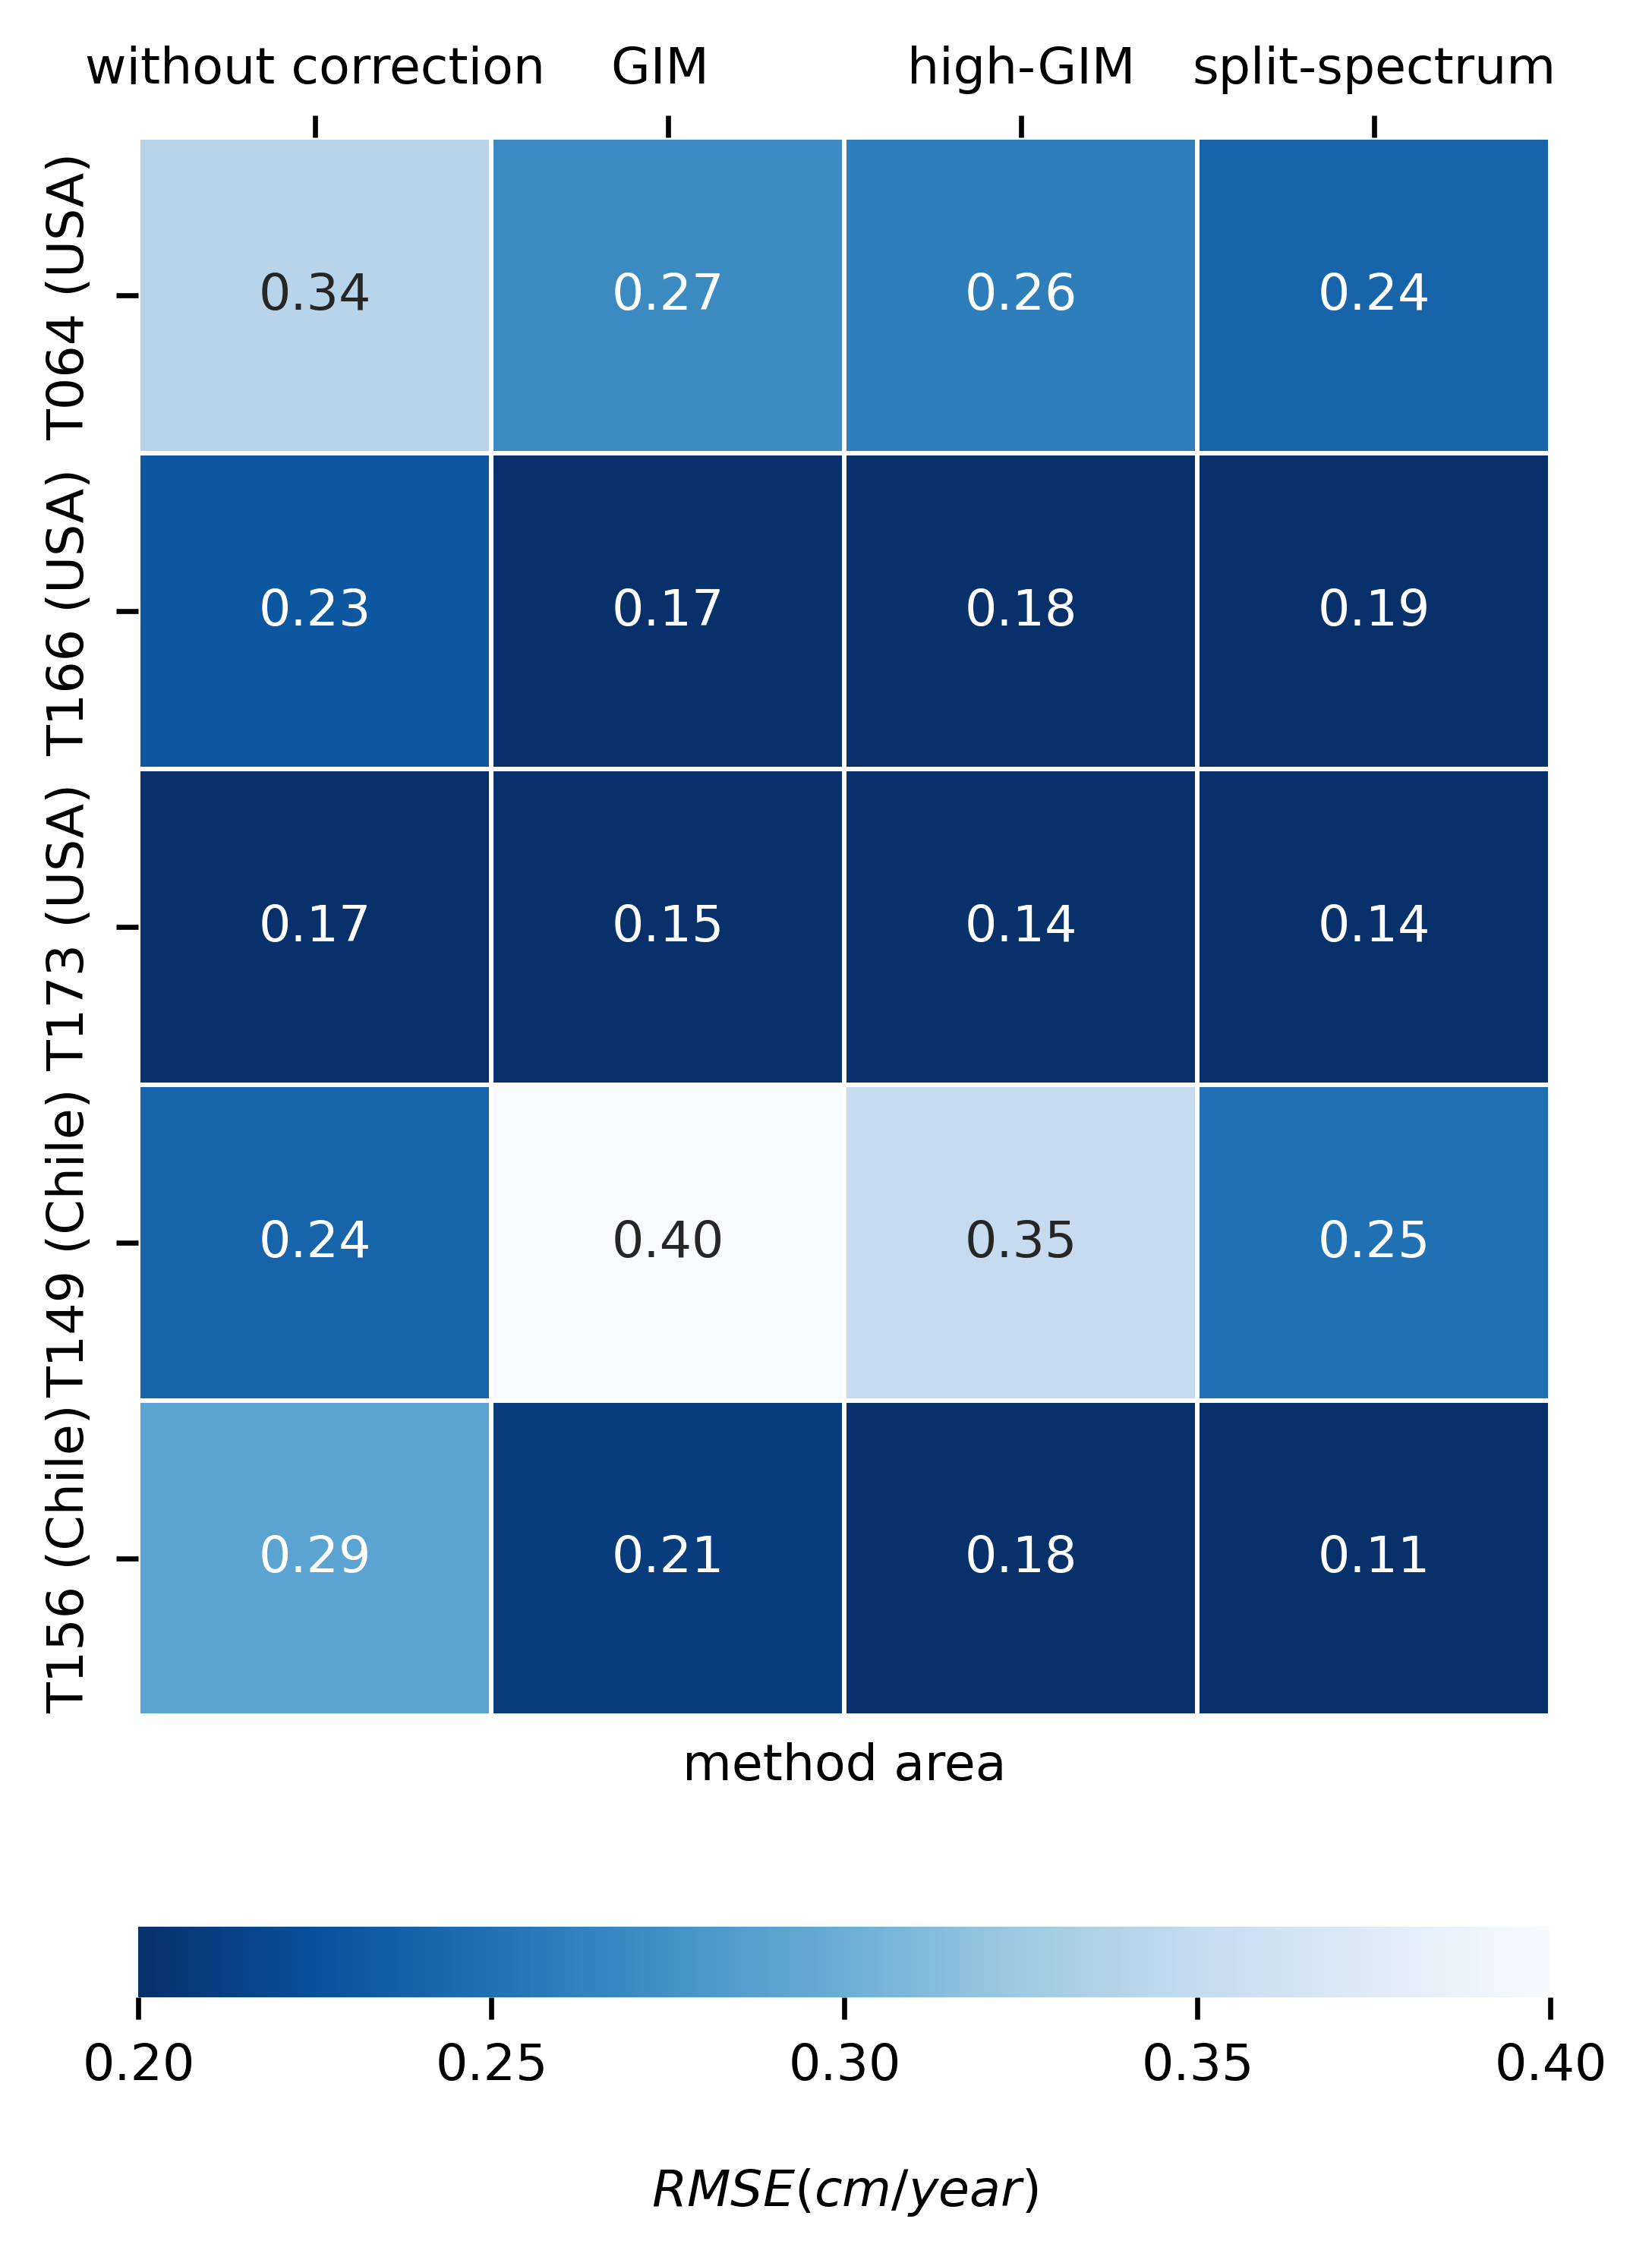

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置全局字体大小
plt.rcParams['font.size'] = 8
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.titlesize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.titlesize'] = 8

# 创建数据
data = {
    'method area': ['without correction', 'GIM ','high-GIM', 'split-spectrum'],
    'T064 (USA)': [0.34, 0.27, 0.26, 0.24],
    'T166 (USA)': [0.23, 0.17, 0.18, 0.19],
    'T173 (USA)': [0.17, 0.15, 0.14, 0.14],
    'T149 (Chile)': [0.24, 0.40, 0.35, 0.25],
    'T156 (Chile)': [0.29, 0.21, 0.18, 0.11]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 转置DataFrame，以便每个地区成为一行
df = df.set_index('method area')

# 使用seaborn的Blues调色板创建自定义颜色映射并反转
custom_cmap = sns.color_palette("Blues", as_cmap=True).reversed()

# 创建热图
plt.figure(dpi=600, figsize=(4, 6))

heatmap = sns.heatmap(df.T, annot=True, cmap=custom_cmap, fmt=".2f", linewidths=.5, 
                      vmin=0.2, vmax=0.4, cbar_kws={'ticks': [0.2, 0.25, 0.3, 0.35, 0.4], 
                                'orientation': 'horizontal', 
                                'pad': 0.1})

# 设置color bar 标签
cbar = heatmap.collections[0].colorbar
cbar.set_label(r'$RMSE (cm/year)$',  labelpad=12)

# 调整坐标轴标签位置
plt.gca().xaxis.set_ticks_position('top')  # 将x轴标签放在上方

plt.savefig('pic/RMSE.png', bbox_inches='tight', transparent=True, dpi=600)

plt.show()

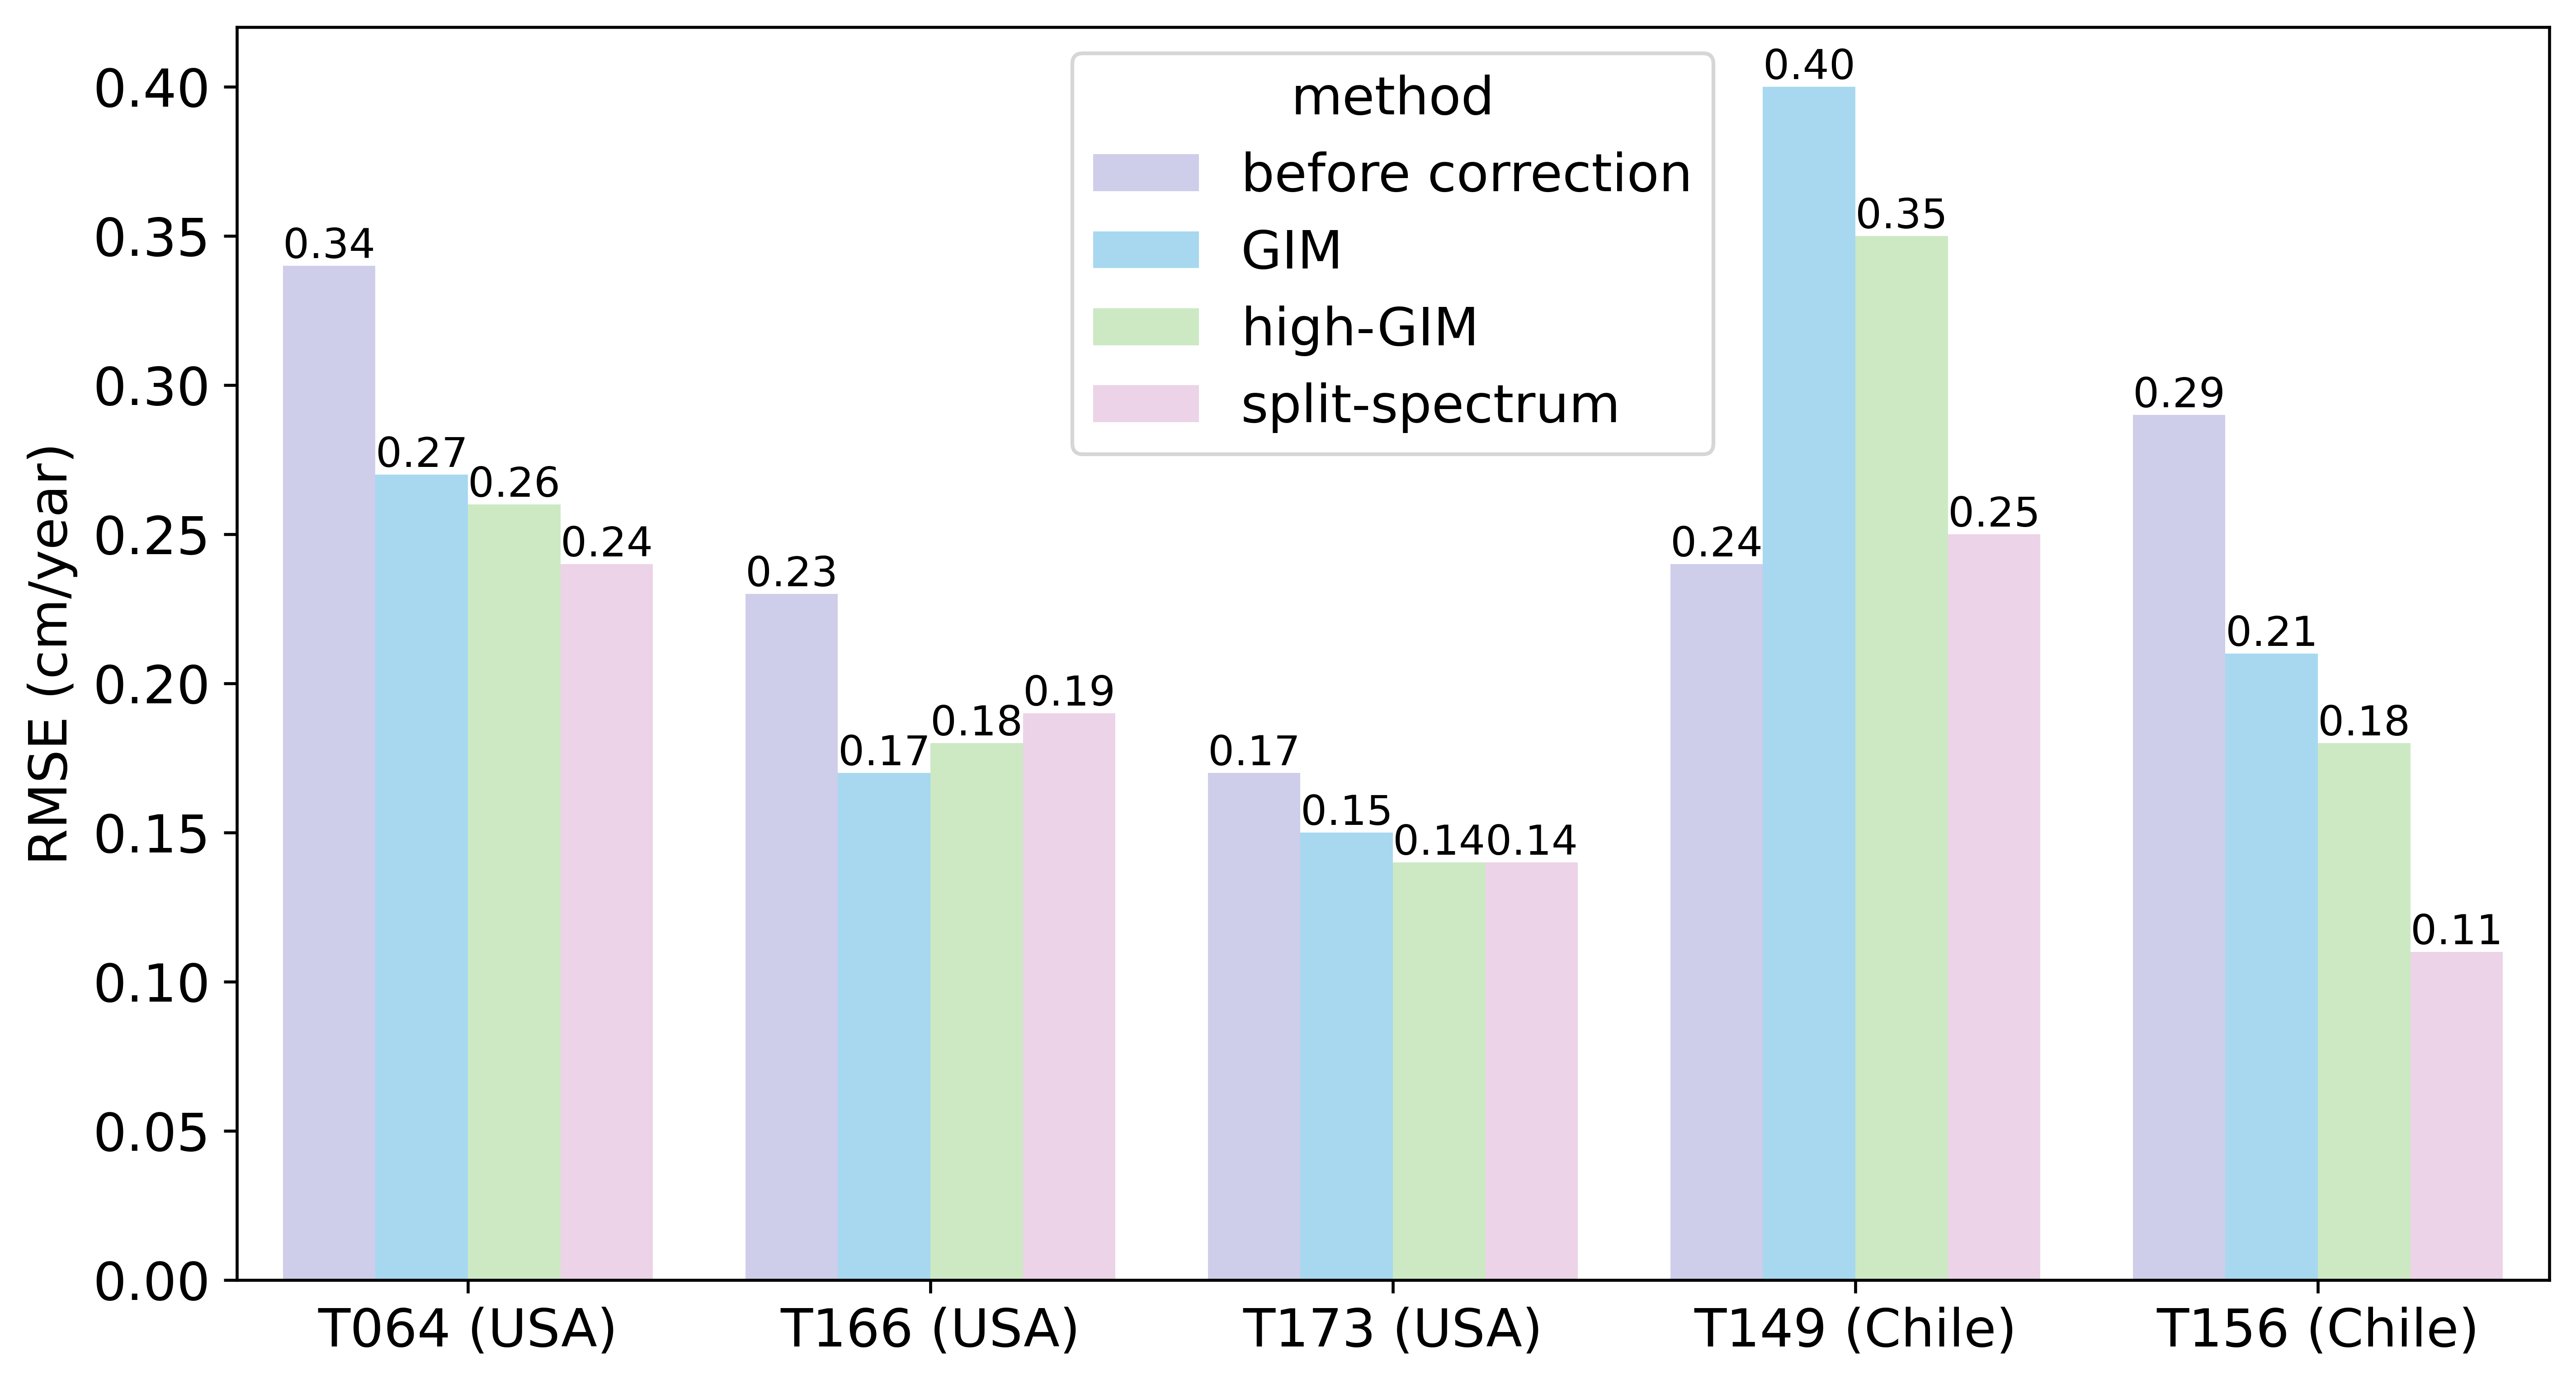

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({'font.size': 14})
# 创建数据
data = {
   'method': ['before correction', 'GIM ', 'high-GIM','split-spectrum'],
   'T064 (USA)': [0.34, 0.27, 0.26, 0.24],
   'T166 (USA)': [0.23, 0.17, 0.18, 0.19],
   'T173 (USA)': [0.17, 0.15, 0.14, 0.14],
   'T149 (Chile)': [0.24, 0.40, 0.35, 0.25],
   'T156 (Chile)': [0.29, 0.21, 0.18, 0.11]
}

# 将数据转换为DataFrame
df = pd.DataFrame(data)

# 长格式数据转换，以便绘制柱状图
df_melt = pd.melt(df, id_vars='method', var_name='region', value_name='RMSE (cm/year)')

# 按照颜色对应关系设置颜色
custom_palette = ["#CAC8EF", "#9BDCFC", "#C9EFBE", "#F0CFEA"]
sns.set_palette(custom_palette)

# 创建柱状图，调整图像大小
plt.figure(dpi = 600, figsize=(11, 6))
ax = sns.barplot(x='region', y='RMSE (cm/year)', hue='method', data=df_melt)

# 设置绘图风格，不显示网格线
ax.grid(False)

for p in ax.patches[0:20]:
    height = p.get_height()
    ax.annotate('{:.2f}'.format(height), (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# 设置轴标签和标题
plt.xlabel('')
plt.ylabel(r'RMSE (cm/year)')
plt.title('')

# 保存图片为PDF
plt.savefig('pdf/RMSE.pdf', bbox_inches='tight', transparent=True, dpi=600)
# 显示图形
plt.show()